# Unit 5 -- Financial Analytics in `R`


| Start Time | End Time | Length | Agenda                                       |
|------------|----------|--------|:---------------------------------------------|
| 10:00am    | 10:40am  | 40 min | Unit 1 - Introduction and Administration     |
| 11:00am    | 11:40am  | 40 min | Unit 2 - EDA and DataViz I                   |
| 11:40am    | 12:20pm  | 40 min | Lunch                                        |
| 12:20pm    | 12:50pm  | 30 min | Unit 3 - EDA and DataViz II                  |
| 13:10pm    | 13:50pm  | 40 min | Unit 4 - Ingest and Basic Stats              |
| 14:10pm    | 14:50pm  | 40 min | **Unit 5 - Finance in R**                    |
| 14:50pm    | 15:00pm  | 10 min | Wrap-Up                                      |

# The Financial Package Ecosystem

`R` has a rich system of financial packages. 

They don't all play well with the `tidy` style we've seen so far, so if you switch between the two systems, you might encounter a bit of friction.

## `xts`

The `xts` package -- E**x**tensible **T**ime **S**eries -- is the basic time series class for the financial ecosystem. 

Fundamental model: 
- irregular time stamps (at millsecond resolution + nanosecond with add-ons)
- matrices rather than data frames for performance
- each column is a series (observable: e.g., bid and ask)

`xts` supports ISO-8601 indexing -- we'll see examples below

## `TTR`

The `TTR` package -- **T**echnical **T**rading **R**ules -- implements the basic build-blocks of many trading rules: 
- moving average calculations
- roling means / medians / 
- volatility calculations
- commonly used technical indicators (Bollinger bands, KST, Donchian Channel, *etc.*)  

## `quantmod`

The `quantmod` package is a "wrapper" for most of the major financial packages, as well as providing some useful functionality which doesn't fit elsewhere. 

We will make extensive use of it for two features: 
- attractive plots ("charting")
- downloading financial data

In [34]:
library(quantmod)
library(TTR)
library(xts)

## Downloads from Yahoo! Finance and makes an SPY time series
SPY <- getSymbols("SPY", auto.assign=FALSE) 
head(SPY)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     112.1708
2007-01-04   141.23   142.05  140.61    141.67   69620600     112.4089
2007-01-05   141.33   141.40  140.38    140.54   76645300     111.5123
2007-01-08   140.82   141.41  140.25    141.19   71655000     112.0280
2007-01-09   141.31   141.60  140.40    141.07   75680100     111.9328
2007-01-10   140.58   141.57  140.30    141.54   72428000     112.3057

In [35]:
## To extract OHLCVA columns produced by quantmod, 
## use the Op(), Hi(), Lo(), Cl(), Vo(), or Ad() columns
head(Ad(SPY))

           SPY.Adjusted
2007-01-03     112.1708
2007-01-04     112.4089
2007-01-05     111.5123
2007-01-08     112.0280
2007-01-09     111.9328
2007-01-10     112.3057

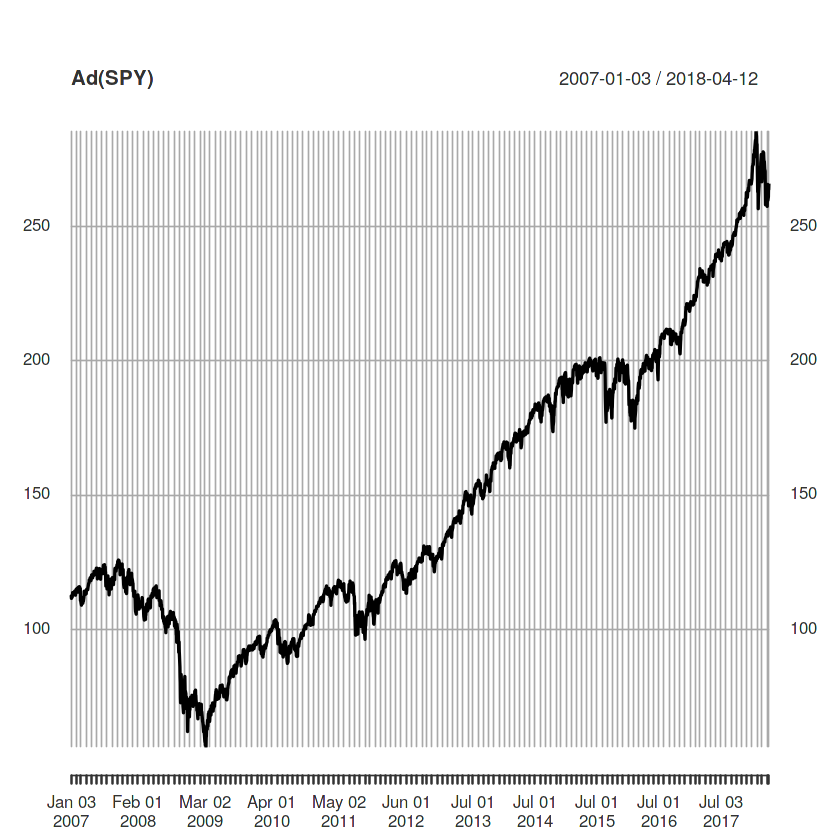

In [36]:
## Basic plotting from xts
plot(Ad(SPY))

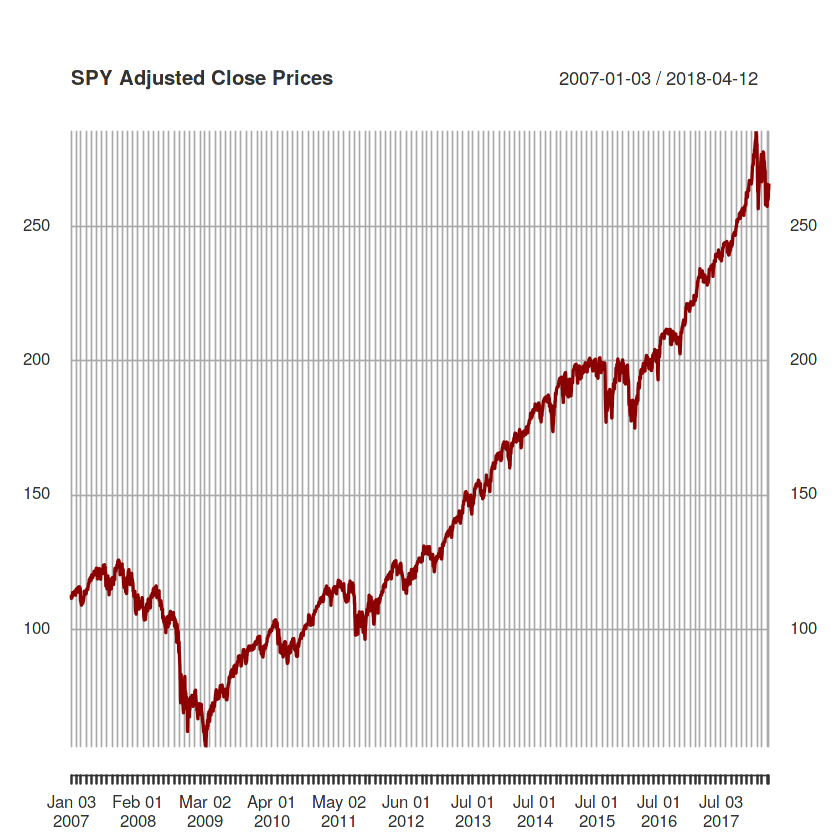

In [37]:
## plot() works like "base graphics" which we haven't discussed
plot(Ad(SPY), main="SPY Adjusted Close Prices", col="red4")


In [38]:
## If you want to use ggplot2, you have to do a bit of work to "massage" things into "tidy" format
## the `timetk` package is useful here

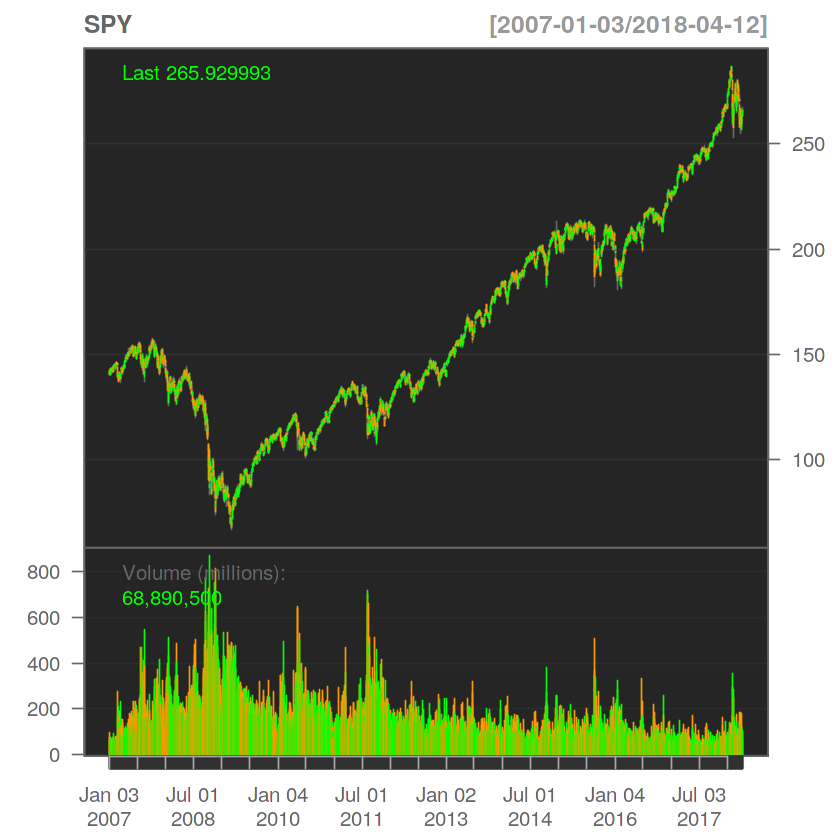

In [39]:
## If you want to do "fancy" charting, use the `chartSeries` function in `quantmod`
chartSeries(SPY)

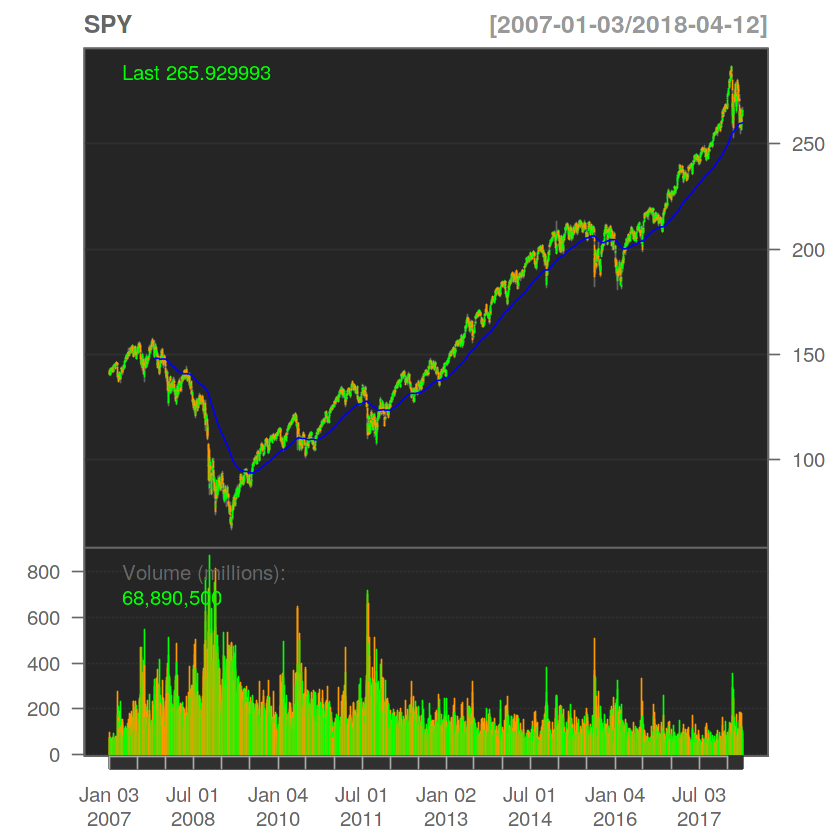

In [40]:
## We can add standard technical indicators
addEMA(n=200)

In [41]:
## xts provides useful subsetting and aggregation routines

## To subset to a particular year: 
SPY["2007"]

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2007-01-03   142.25   142.86  140.57    141.37   94807600     112.1708
2007-01-04   141.23   142.05  140.61    141.67   69620600     112.4089
2007-01-05   141.33   141.40  140.38    140.54   76645300     111.5123
2007-01-08   140.82   141.41  140.25    141.19   71655000     112.0280
2007-01-09   141.31   141.60  140.40    141.07   75680100     111.9328
2007-01-10   140.58   141.57  140.30    141.54   72428000     112.3057
2007-01-11   141.58   142.62  141.50    142.16   54476800     112.7977
2007-01-12   142.15   143.24  142.11    143.24   55370600     113.6546
2007-01-16   143.07   143.44  142.73    142.96   44871300     113.4324
2007-01-17   142.85   143.46  142.73    143.02   50241400     113.4800
2007-01-18   143.17   143.26  142.31    142.54   68177300     113.0992
2007-01-19   142.54   143.10  142.46    142.82   56973000     113.3213
2007-01-22   143.07   143.10  141.93    142.38   60253600     112.9722
2007-0

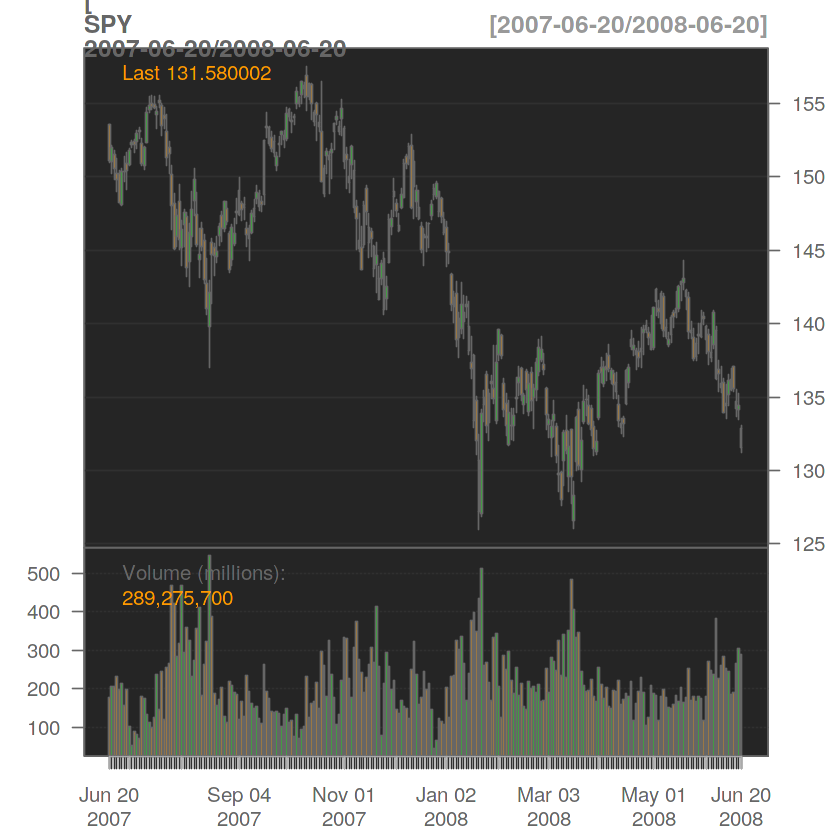

In [42]:
## Or a range
chartSeries(SPY["2007-06-20/2008-06-20"])

In [43]:
## We can also summarize to higher frequencies
## Note that everything is converted correctly 
to.monthly(SPY)

         SPY.Open SPY.High SPY.Low SPY.Close  SPY.Volume SPY.Adjusted
Jan 2007   142.25   144.13  140.25    143.75  1330329900    114.05925
Feb 2007   144.15   146.42  139.00    140.93  1494548900    111.82169
Mar 2007   139.34   143.81  136.75    142.00  2918304400    113.11757
Apr 2007   142.16   149.80  141.48    148.29  1791289900    118.12823
May 2007   148.42   153.89  147.67    153.32  2508178000    122.13518
Jun 2007   153.88   154.40  148.06    150.43  3502885400    120.34945
Jul 2007   150.87   155.53  145.04    145.72  3988676200    116.58130
Aug 2007   145.18   150.59  137.00    147.59  6195918600    118.07735
Sep 2007   147.45   154.39  144.33    152.58  2967009200    122.64864
Oct 2007   152.60   157.52  148.66    154.65  3850069600    124.31256
Nov 2007   153.29   153.41  140.66    148.66  5472709900    119.49760
Dec 2007   148.19   152.89  143.96    146.21  3293787500    118.15197
Jan 2008   146.53   146.99  126.00    137.37  6106834300    111.00839
Feb 2008   137.94   

In [44]:
## To get returns use ROC ("rate of change")
ROC(Ad(to.monthly(SPY)))

          SPY.Adjusted
Jan 2007            NA
Feb 2007 -1.981254e-02
Mar 2007  1.152220e-02
Apr 2007  4.334299e-02
May 2007  3.335774e-02
Jun 2007 -1.472886e-02
Jul 2007 -3.181071e-02
Aug 2007  1.275102e-02
Sep 2007  3.798376e-02
Oct 2007  1.347540e-02
Nov 2007 -3.950278e-02
Dec 2007 -1.132459e-02
Jan 2008 -6.236594e-02
Feb 2008 -2.618231e-02
Mar 2008 -8.982595e-03
Apr 2008  4.656137e-02
May 2008  1.500342e-02
Jun 2008 -8.727591e-02
Jul 2008 -9.026534e-03
Aug 2008  1.533568e-02
Sep 2008 -9.890741e-02
Oct 2008 -1.805471e-01
Nov 2008 -7.214777e-02
Dec 2008  9.748243e-03
Jan 2009 -8.568227e-02
Feb 2009 -1.136714e-01
Mar 2009  8.002182e-02
Apr 2009  9.471543e-02
May 2009  5.680875e-02
Jun 2009 -6.549249e-04
Jul 2009  7.195382e-02
Aug 2009  3.627358e-02
Sep 2009  3.484296e-02
Oct 2009 -1.941243e-02
Nov 2009  5.978358e-02
Dec 2009  1.892104e-02
Jan 2010 -3.701970e-02
Feb 2010  3.071828e-02
Mar 2010  5.909815e-02
Apr 2010  1.535180e-02
May 2010 -8.278862e-02
Jun 2010 -5.312765e-02
Jul 2010  6

In [45]:
## By default, calculates continuous == geometric  returns
## Can get simple (discrete) returns as well
ROC(Ad(to.yearly(SPY)), type="discrete")

            SPY.Adjusted
2007-12-31            NA
2008-12-31 -0.3679500393
2009-12-31  0.2635180335
2010-12-31  0.1505612402
2011-12-30  0.0189498985
2012-12-31  0.1599037113
2013-12-31  0.3230788539
2014-12-31  0.1346344583
2015-12-31  0.0123429260
2016-12-30  0.1199793513
2017-12-29  0.2170539594
2018-04-12  0.0005062239

# Performance Analysis with `PerformanceAnalytics`

The `PerformanceAnalytics` package provides tools for (ex-post) performance analysis. 

We will use a built-in data set of hedge fund sytle returns to explore this package

In [46]:
library(PerformanceAnalytics)
data("edhec")
edhec

           Convertible Arbitrage CTA Global Distressed Securities
1997-01-31                0.0119     0.0393                0.0178
1997-02-28                0.0123     0.0298                0.0122
1997-03-31                0.0078    -0.0021               -0.0012
1997-04-30                0.0086    -0.0170                0.0030
1997-05-31                0.0156    -0.0015                0.0233
1997-06-30                0.0212     0.0085                0.0217
1997-07-31                0.0193     0.0591                0.0234
1997-08-31                0.0134    -0.0473                0.0147
1997-09-30                0.0122     0.0198                0.0350
1997-10-31                0.0100    -0.0098               -0.0064
1997-11-30                0.0000     0.0133                0.0054
1997-12-31                0.0068     0.0286                0.0073
1998-01-31                0.0145     0.0104                0.0095
1998-02-28                0.0146    -0.0065                0.0227
1998-03-31

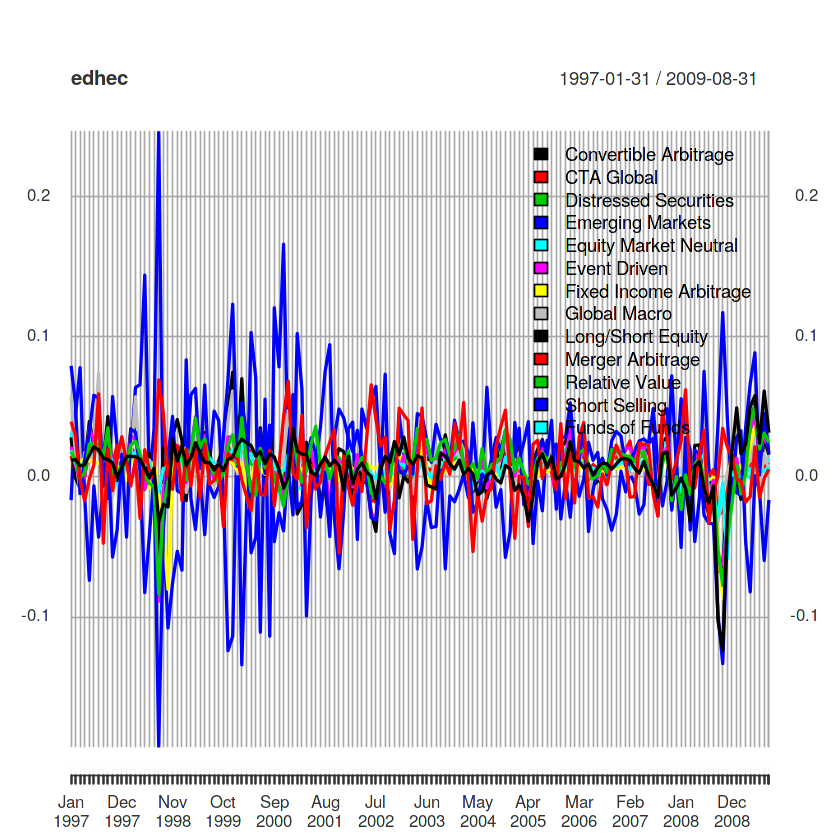

In [47]:
plot(edhec, legend.loc="topright")

In [48]:
## The simplest measure of performance is the SharpeRatio
SharpeRatio(edhec)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds of Funds
"StdDev Sharpe (Rf=0%, p=95%):",0.31967021,0.2582269,0.4334711,0.2137865,0.6665282,0.4153772,0.29855572,0.4507954,0.3499564,0.6075128,0.5078801,0.07552172,0.3249744
"VaR Sharpe (Rf=0%, p=95%):",0.19734443,0.1919833,0.2892904,0.1295921,0.5290353,0.2710161,0.17143740,0.4955521,0.2554694,0.4563192,0.3478610,0.05599415,0.2364671
"ES Sharpe (Rf=0%, p=95%):",0.06437672,0.1514751,0.1306556,0.0644792,0.1399201,0.1289815,0.07108602,0.3868471,0.1647833,0.2039721,0.1370940,0.04611866,0.1281444


In [49]:
## Let's look at the options
?SharpeRatio

In [50]:
## Let's calculate an annualized version of the 'standard' Sharpe ratio
SharpeRatio(edhec, annualize=TRUE, FUN="StdDev")

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds of Funds
"Annualized StdDev Sharpe (Rf=0%, p=95%):",1.109066,0.8811684,1.534159,0.7006117,2.369965,1.465998,1.032273,1.597896,1.223953,2.164008,1.800934,0.1710821,1.129695


In [51]:
## The rollapply function is useful for calculating rolling estimates
rollapply(edhec, 24, SharpeRatio, annualize=TRUE, FUN="StdDev")

           Convertible Arbitrage CTA Global Distressed Securities
1997-01-31                    NA         NA                    NA
1997-02-28                    NA         NA                    NA
1997-03-31                    NA         NA                    NA
1997-04-30                    NA         NA                    NA
1997-05-31                    NA         NA                    NA
1997-06-30                    NA         NA                    NA
1997-07-31                    NA         NA                    NA
1997-08-31                    NA         NA                    NA
1997-09-30                    NA         NA                    NA
1997-10-31                    NA         NA                    NA
1997-11-30                    NA         NA                    NA
1997-12-31                    NA         NA                    NA
1998-01-31                    NA         NA                    NA
1998-02-28                    NA         NA                    NA
1998-03-31

In [52]:
## By default, keeps the same dates so returns NA values at the top
## we can drop this using na.omit() function
na.omit(rollapply(edhec, 24, SharpeRatio, annualize=TRUE, FUN="StdDev"))

           Convertible Arbitrage CTA Global Distressed Securities
1998-12-31           0.013689729 0.02654247           0.023062407
1999-01-31           0.013989618 0.02638722           0.023069295
1999-02-28           0.013954239 0.02611094           0.023080803
1999-03-31           0.014011724 0.02620041           0.023139180
1999-04-30           0.014419380 0.02577873           0.024256795
1999-05-31           0.014442855 0.02617177           0.024188912
1999-06-30           0.014188957 0.02633899           0.024359262
1999-07-31           0.013989633 0.02425875           0.024128477
1999-08-31           0.013941664 0.02148307           0.024091690
1999-09-30           0.013910615 0.02135489           0.023391005
1999-10-31           0.013904704 0.02287364           0.023274178
1999-11-30           0.013871708 0.02292276           0.023524788
1999-12-31           0.013937934 0.02252266           0.024033485
2000-01-31           0.014212028 0.02254568           0.024030575
2000-02-29

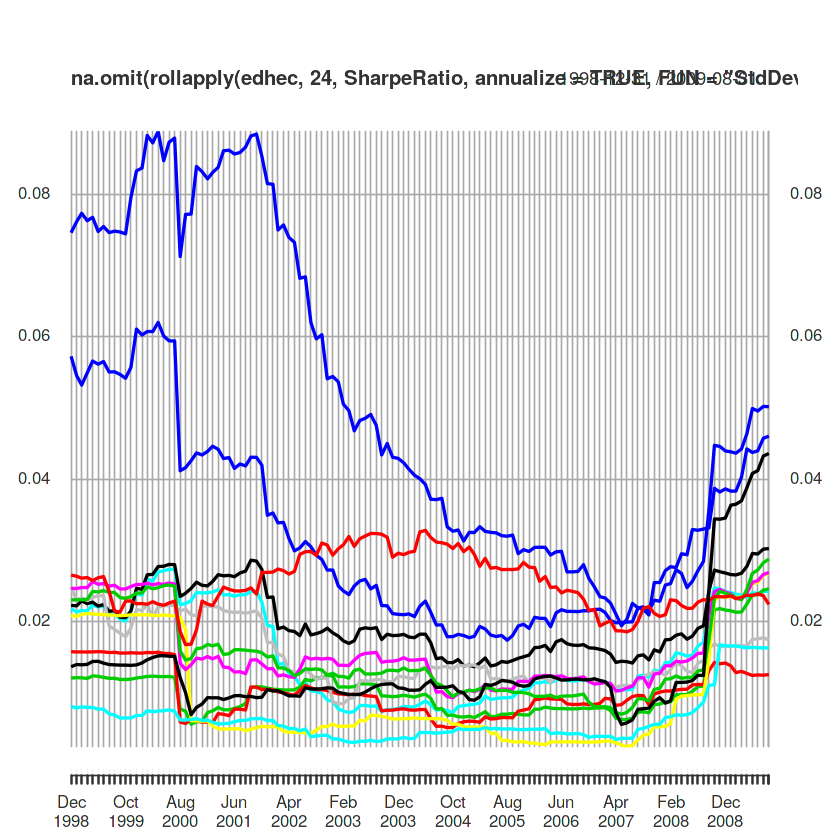

In [53]:
plot(na.omit(rollapply(edhec, 24, SharpeRatio, annualize=TRUE, FUN="StdDev")))

`PerformanceAnalytics` has a nice set of built-in charts which give standard performance summaries

They all have names starting with "chart" or "charts" depending on whether they are multi-panel

In [54]:
## A bit of trickery to list function mames
pa_funcs <- ls(pos=which(grepl("PerformanceAnalytics", search()))); pa_funcs[grep("chart", pa_funcs)]

[1] "chart.ACF"                       "chart.ACFplus"                  
 [3] "chart.Bar"                       "chart.BarVaR"                   
 [5] "chart.Boxplot"                   "chart.CaptureRatios"            
 [7] "chart.Correlation"               "chart.CumReturns"               
 [9] "chart.Drawdown"                  "chart.ECDF"                     
[11] "chart.Events"                    "chart.Histogram"                
[13] "chart.QQPlot"                    "chart.Regression"               
[15] "chart.RelativePerformance"       "chart.RiskReturnScatter"        
[17] "chart.RollingCorrelation"        "chart.RollingMean"              
[19] "chart.RollingPerformance"        "chart.RollingQuantileRegression"
[21] "chart.RollingRegression"         "chart.Scatter"                  
[23] "chart.SnailTrail"                "chart.StackedBar"               
[25] "chart.TimeSeries"                "chart.VaRSensitivity"           
[27] "charts.Bar"                      "charts.BarVaR"                  
[29] "charts.PerformanceSummary"       "charts.RollingPerformance"      
[31] "charts.RollingRegression"        "charts.TimeSeries"

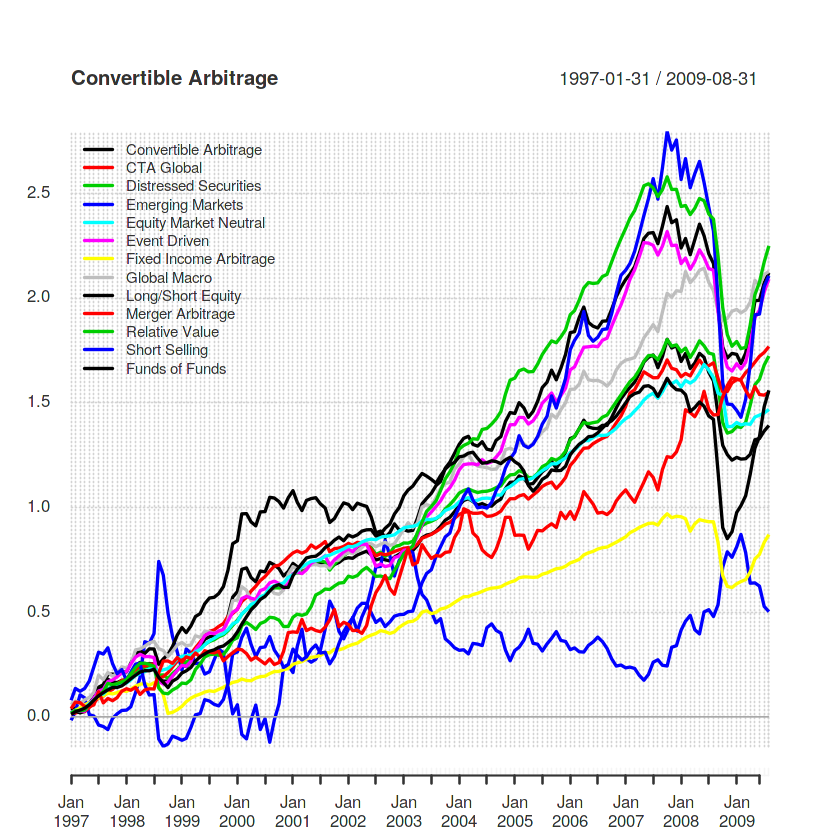

In [55]:
## Equity curve
chart.CumReturns(edhec, legend.loc="topleft")

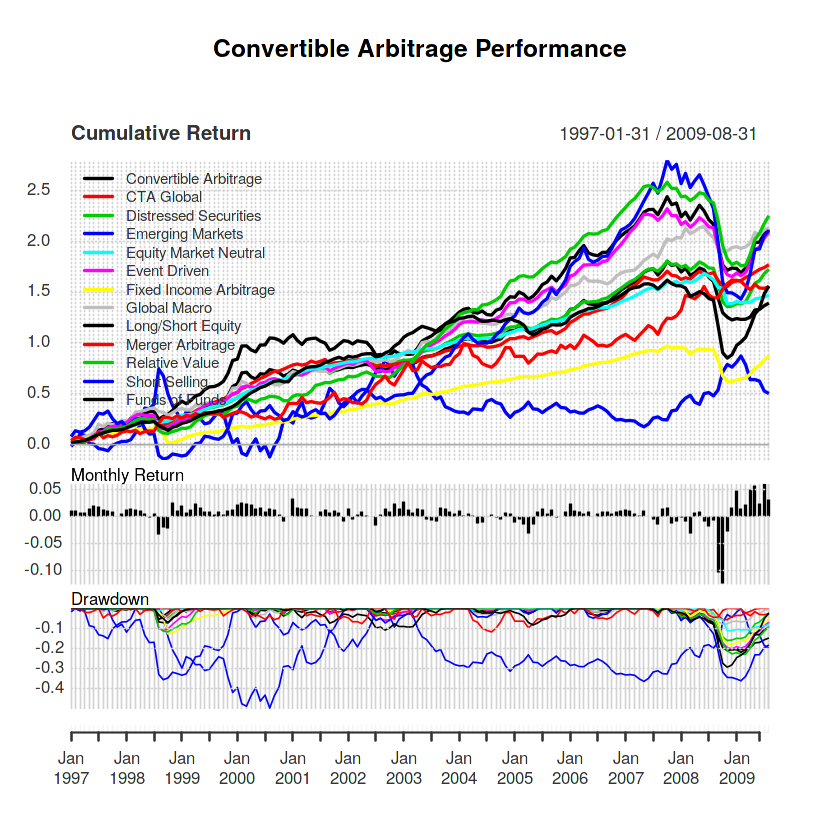

In [56]:
## Drawdowns, equity, and returns
charts.PerformanceSummary(edhec, legend.loc="topleft")

So far, we have only looked at single-asset statistics

The real power of PA comes from multi-asset analysis

Most functions accept a `weights` argument to work on a weighted portfolio. 

In [57]:
VaR(edhec[,1:5], weights=rep(0.2, 5), portfolio_method="component")

$MVaR
[1] 0.02209855

$contribution
Convertible Arbitrage            CTA Global Distressed Securities 
         0.0052630876         -0.0001503125          0.0047567783 
     Emerging Markets Equity Market Neutral 
         0.0109935244          0.0012354711 

$pct_contrib_MVaR
Convertible Arbitrage            CTA Global Distressed Securities 
          0.238164397          -0.006801916           0.215252972 
     Emerging Markets Equity Market Neutral 
          0.497477204           0.055907342

## Designing Portfolios: `PortfolioAnalytics`

So far, we have analyzed a given portfolio. In practice, we want to create portfolios -- one common approach is 
to use some sort of portfolio optimizer. 

The `PortfolioAnalytics` package provides a flexible framework for portfolio optimization. Let's use it to 
create a simple Markowitz style (mean-variance optimized) portfolio. 

In [58]:
library(PortfolioAnalytics)

## Take 5 assets to keep things simple
funds <- edhec[,1:5]
fund_names <- colnames(funds)

## We first create a portfolio
port_spec <- portfolio.spec(assets=fund_names)

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = fund_names)

Number of assets: 5 
Asset Names
[1] "Convertible Arbitrage" "CTA Global"            "Distressed Securities"
[4] "Emerging Markets"      "Equity Market Neutral"


In [59]:
## Next we add some constraints:

## A slightly loose full-investment constraint
port_spec <- add.constraint(port_spec, type="weight_sum", min_sum=0.95, max_sum=1)

## Long only
port_spec <- add.constraint(port_spec, type="long_only")

## And a minimum return constraint
port_spec <- add.constraint(port_spec, type="return", return_target=0.01)

port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = fund_names)

Number of assets: 5 
Asset Names
[1] "Convertible Arbitrage" "CTA Global"            "Distressed Securities"
[4] "Emerging Markets"      "Equity Market Neutral"

Constraints
Enabled constraint types
		- weight_sum 
		- long_only 
		- return 


In [60]:
## Now we want to minimize the risk (standard-deviation) subject to that constraint
port_spec <- add.objective(portfolio=port_spec, type="risk", name="var")
port_spec

**************************************************
PortfolioAnalytics Portfolio Specification 
**************************************************

Call:
portfolio.spec(assets = fund_names)

Number of assets: 5 
Asset Names
[1] "Convertible Arbitrage" "CTA Global"            "Distressed Securities"
[4] "Emerging Markets"      "Equity Market Neutral"

Constraints
Enabled constraint types
		- weight_sum 
		- long_only 
		- return 

Objectives:
Enabled objective names
		- var 


In [61]:
## Finally, we run the optimizer
optimal_port <- optimize.portfolio(R=funds, portfolio=port_spec, optimize_method="DEoptim")

optimal_port

Iteration: 1 bestvalit: 20.916943 bestmemit:    0.060000    0.060000    0.290000    0.580000    0.008000
Iteration: 2 bestvalit: 20.916943 bestmemit:    0.060000    0.060000    0.290000    0.580000    0.008000
Iteration: 3 bestvalit: 19.077781 bestmemit:    0.002000    0.014000    0.054000    0.888000    0.040000
Iteration: 4 bestvalit: 19.077781 bestmemit:    0.002000    0.014000    0.054000    0.888000    0.040000
Iteration: 5 bestvalit: 18.510337 bestmemit:    0.000000    0.006000    0.085139    0.896000    0.008000
Iteration: 6 bestvalit: 18.510337 bestmemit:    0.000000    0.006000    0.085139    0.896000    0.008000
Iteration: 7 bestvalit: 18.510337 bestmemit:    0.000000    0.006000    0.085139    0.896000    0.008000
Iteration: 8 bestvalit: 18.510337 bestmemit:    0.000000    0.006000    0.085139    0.896000    0.008000
Iteration: 9 bestvalit: 18.510337 bestmemit:    0.000000    0.006000    0.085139    0.896000    0.008000
Iteration: 10 bestvalit: 18.510337 bestmemit:    0.0000

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = funds, portfolio = port_spec, optimize_method = "DEoptim")

Optimal Weights:
Convertible Arbitrage            CTA Global Distressed Securities 
               0.0000                0.0060                0.0851 
     Emerging Markets Equity Market Neutral 
               0.8960                0.0080 

Objective Measures:
 StdDev 
0.03586 




In [62]:
## If we are interested in the entire mean-variance _frontier_ we can supplement 
## the mean constraint with an objective
port_spec2 <- portfolio.spec(assets=fund_names)

port_spec2 <- add.constraint(port_spec2, type="weight_sum", min_sum=0.95, max_sum=1)
port_spec2 <- add.constraint(port_spec2, type="long_only")
port_spec2 <- add.constraint(port_spec2, type="return", return_target=0.007)

## And risk & return objectives
port_spec2 <- add.objective(portfolio=port_spec2, type="risk", name="var")
port_spec2 <- add.objective(port_spec2, type="return", name="mean", multiplier=0)

op2 <- optimize.portfolio(R=funds, portfolio=port_spec2, optimize_method="DEoptim", trace=TRUE, search_size = 4000)
op2

Iteration: 1 bestvalit: 0.121505 bestmemit:    0.410000    0.014000    0.112000    0.394000    0.022000
Iteration: 2 bestvalit: 0.091253 bestmemit:    0.127662    0.160133    0.030000    0.374000    0.302000
Iteration: 3 bestvalit: 0.091253 bestmemit:    0.127662    0.160133    0.030000    0.374000    0.302000
Iteration: 4 bestvalit: 0.091253 bestmemit:    0.127662    0.160133    0.030000    0.374000    0.302000
Iteration: 5 bestvalit: 0.034900 bestmemit:    0.349771    0.180380    0.132919    0.281958    0.034000
Iteration: 6 bestvalit: 0.034900 bestmemit:    0.349771    0.180380    0.132919    0.281958    0.034000
Iteration: 7 bestvalit: 0.034900 bestmemit:    0.349771    0.180380    0.132919    0.281958    0.034000
Iteration: 8 bestvalit: 0.034900 bestmemit:    0.349771    0.180380    0.132919    0.281958    0.034000
Iteration: 9 bestvalit: 0.034900 bestmemit:    0.349771    0.180380    0.132919    0.281958    0.034000
Iteration: 10 bestvalit: 0.034900 bestmemit:    0.349771    0.18

***********************************
PortfolioAnalytics Optimization
***********************************

Call:
optimize.portfolio(R = funds, portfolio = port_spec2, optimize_method = "DEoptim", 
    search_size = 4000, trace = TRUE)

Optimal Weights:
Convertible Arbitrage            CTA Global Distressed Securities 
                0.008                 0.638                 0.350 
     Emerging Markets Equity Market Neutral 
                0.000                 0.004 

Objective Measures:
 StdDev 
0.01683 


    mean 
0.006999 




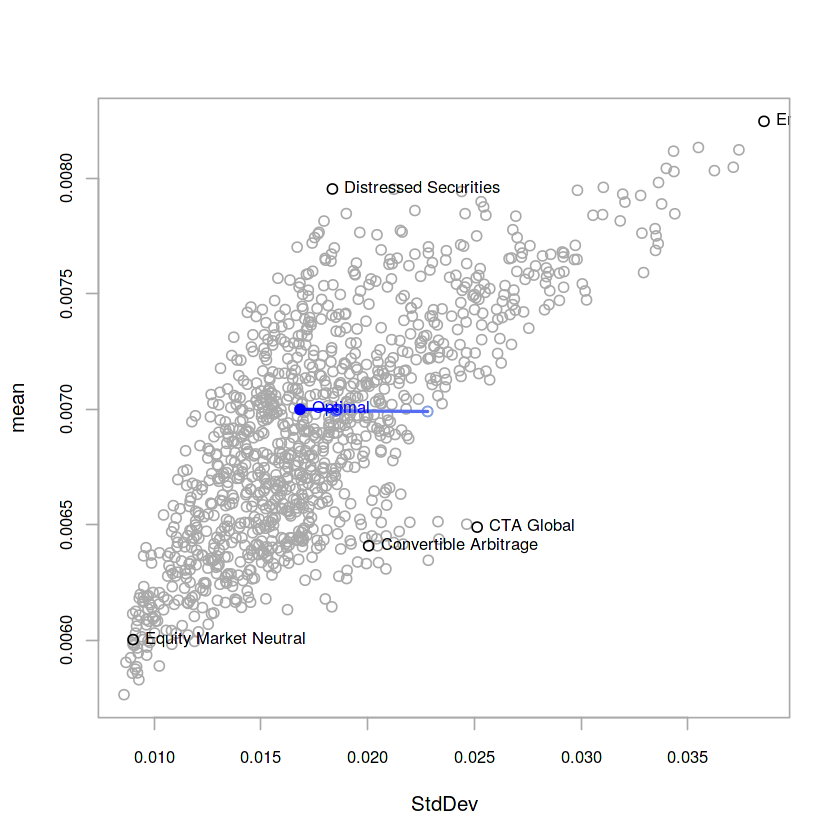

In [63]:
chart.RiskReward(op2, risk.col="StdDev", chart.assets=TRUE)